In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

from heatmap import make_heatmap, matricize_df
import viz_helpers

# Seaborn style defaults. Relevant changes for us are default font, and no ticks for heatmaps
sns.set_theme()

pd.set_option('display.max_rows', 100)

# Default (all reddit) counts
df = viz_helpers.load_df()
df.head(5)

,pre,suff,count,wikt
0,cum,wad,372.0,True
1,cum,bag,1608.0,False
2,cum,bucket,4441.0,True
3,cum,sack,212.0,False
4,cum,ball,654.0,True


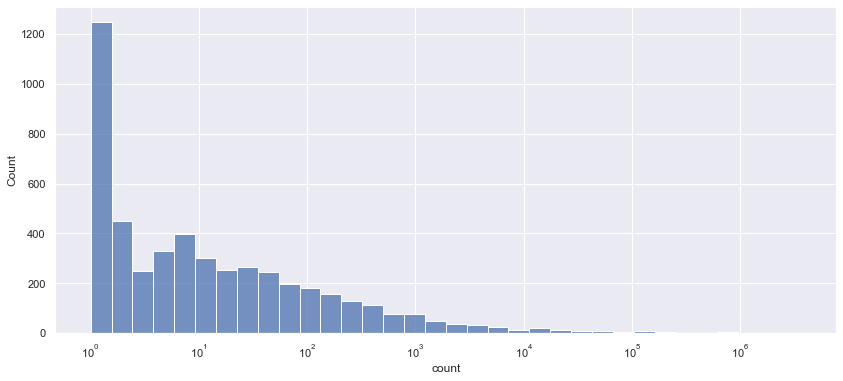

In [3]:
FS = (14, 6)
fig, ax = plt.subplots(figsize=FS)
gf = df.copy()
gf['count'] += 1
sns.histplot(
    data=gf,
    x="count",
    log_scale=True,
    ax=ax,
);

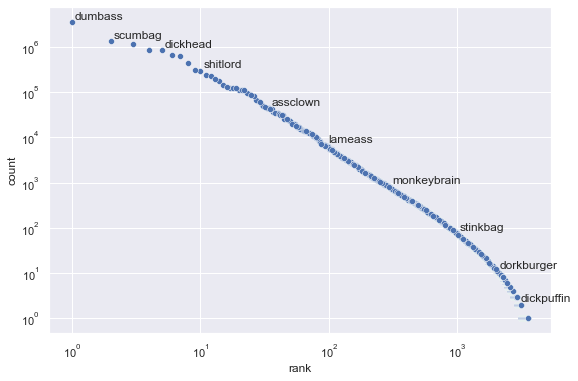

In [4]:
rf = df.copy()
rf['rank'] = rf['count'].rank(ascending=False, method='first')

# TODO: offset labels a bit
ranks = [1, 2, 5, 9, 30, 100, 300, 1000, 2003, 3000]
ranks = [1, 2, 5, 10, 34, 101, 300, 1001, 2000, 3000]
ranks = [1, 2, 5, 10, 34, 93, 295, 988, 1973, 2954]
ranks = [1, 2, 5, 10, 34, 93, 295, 988, 2037, 2954]
rf['hilite'] = rf['rank'].isin(ranks)

# (Originally something like 18, 10, but looks like anything >~9 inches in width will get squished in blog layout)
FS = (9, 6)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=FS)

marker = 'o'
sns.scatterplot(
    data=rf[rf['count'] > 0],
    x='rank',
    y='count',
    ax=ax,
    marker=marker,
    #edgecolor=None,
    #alpha=.66,
    #markers=True,
    #mec=None,
    #hue='hilite',
    #legend=False,
    #markers=True,
)
# Use separate colors for labelled pts. I think it just ends up distracting though.
HILITE = 0 
if HILITE:
    # Hack
    sns.scatterplot(
        data=rf[rf['hilite']],
        #hue='orange',
        x='rank',
        y='count',
        ax=ax,
        marker=marker,
    )
ax.set_xscale('log')
ax.set_yscale('log');

samples = rf[rf['rank'].isin(ranks)]
disp_to_dat = ax.transData.inverted()
dat_to_disp = ax.transData
xnudge = 3
ynudge = 2.5
for _, row in samples.iterrows():
    term = row['pre'] + row['suff']
    xdisp, ydisp = dat_to_disp.transform((row['rank'], row['count']))
    x, y = disp_to_dat.transform((xdisp + xnudge, ydisp + ynudge))
    ax.text(x, y, term)
#ax.set_facecolor( [x/255 for x in (255, 235, 219)] )
#sns.despine();

In [5]:
viz_helpers.savefig(fig, 'zipf', bbox_inches='tight', dpi=fig.dpi*2)

In [79]:
fig.

AttributeError: 'Figure' object has no attribute 'bgcolor'

In [39]:
rf[
    (rf.pre == 'gay')
    &
    (rf.suff == 'fart')
]

,pre,suff,count,wikt,rank
2113,gay,fart,12.0,False,1973.0


In [33]:
ranks = [1, 2, 5, 10, 34, 101, 300, 1001, 2000, 3000]
samples = rf[rf['rank'].isin(ranks)]
samples.sort_values(by='rank')

,pre,suff,count,wikt,rank
1948,dumb,ass,3631047.65,True,1.0
3213,scum,bag,1347188.10,True,2.0
1222,dick,head,855756.40,True,5.0
603,shit,lord,300941.65,True,10.0
1042,ass,clown,44219.60,True,34.0
586,shit,bucket,5669.00,True,101.0
1788,fuck,nozzle,789.00,False,300.0
4308,stink,bag,76.00,True,1001.0
2113,gay,fart,12.00,False,2000.0
1182,dick,puffin,2.00,False,3000.0


In [3]:
rf[(rf['rank'] > 1950) & (rf['rank'] < 2050)].sort_values(by='rank')

,pre,suff,count,wikt,rank,hilite
141,snot,shit,12.0,False,1951.0,False
242,jizz,bro,12.0,False,1952.0,False
261,jizz,boat,12.0,False,1953.0,False
281,jizz,tard,12.0,False,1954.0,False
372,puke,pile,12.0,False,1955.0,False
390,puke,whore,12.0,False,1956.0,False
438,spunk,wad,12.0,False,1957.0,False
469,spunk,waffle,12.0,False,1958.0,False
492,spunk,head,12.0,False,1959.0,False
520,fart,monkey,12.0,False,1960.0,False


In [43]:
rf[rf.suff == 'puffin'].sort_values(by='rank')

,pre,suff,count,wikt,rank
1839,wank,puffin,532.0,True,368.0
1766,fuck,puffin,20.0,False,1676.0
2277,fag,puffin,19.0,False,1705.0
4759,faggot,puffin,16.0,False,1814.0
598,shit,puffin,13.0,False,1899.0
1328,twat,puffin,10.0,False,2079.0
452,spunk,puffin,8.0,False,2197.0
1255,cock,puffin,5.0,False,2486.0
14,cum,puffin,2.0,False,2899.0
1182,dick,puffin,2.0,False,2954.0


In [18]:
help(t.set_position)

Help on method set_position in module matplotlib.text:

set_position(xy) method of matplotlib.text.Text instance
    Set the (*x*, *y*) position of the text.
    
    Parameters
    ----------
    xy : (float, float)



In [5]:
len(rf[rf['count'] > 0])

3309

In [6]:
rf.sort_values(by='rank').head(1)

,pre,suff,count,wikt,rank
1921,dumb,ass,3631047.65,True,1.0


In [113]:
x = df.copy()
x.head()

,pre,suff,count,wikt
0,cum,wad,372.0,True
1,cum,bag,1608.0,False
2,cum,bucket,4441.0,True
3,cum,sack,212.0,False
4,cum,ball,654.0,True


In [115]:
x.drop('count', 1)

,pre,suff,wikt
0,cum,wad,True
1,cum,bag,False
2,cum,bucket,True
3,cum,sack,False
4,cum,ball,True
...,...,...,...
4813,faggot,shit,False
4814,faggot,fart,False
4815,faggot,wit,False
4816,faggot,lib,False
